In [1]:
dt = 0.001 #milisekundy, 1/1000 sekundy
using Plots

In [2]:
# dane
g = 9.81
m = 65
vx₀ = 26.5
α = 45
vy₀=26.5
v₀=26.5
# obliczenia
czas = (2 * v₀ * sin(α)) / g
#zasieg = (v₀ ^ 2 * sin(2 * α)) / g
h=80
hₘ = h+((v₀ * sin(α)) ^ 2) / (2 * g)
czas = (2 * v₀ * sin(α)) / g

k=0.5


0.5

In [3]:
delta1=4*v₀^4*sin(α)*sin(α)*cos(α)*cos(α)+8*g*h*v₀^2*cos(α)*cos(α)
zasieg=(-2*v₀^2*sin(α)*cos(α)-sqrt(delta1))/(-2*g)

96.68750422060688

In [4]:
delta2=v₀^2*sin(α)*sin(α)+2*g*h
t1=(-v₀*sin(α)-sqrt(delta2))/(-g)

#t2=(-v₀*sin(α)+sqrt(delta2))/(-g) ujemne wiec do wyjebania

6.9454261245373194

In [48]:
function vx_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, czas / dt), 1)
    vx[1] = v₀ * cos(α)
    for i in (2 : floor(Int, czas / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
    end
    return vx
end

function vy_num(v₀, α, k, m, g, dt)
    vy = zeros(floor(Int, czas / dt), 1)
    vy[1] = v₀ * sin(α)
    for i in (2 : floor(Int, czas / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
    end
    return vy
end


function x_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2
    end
    return x
end

function y_num(v₀, α, k, m, g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end


y_num (generic function with 1 method)

**z wiaterkiem**

In [49]:
function vx_wind(v₀,vw, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1)/ dt), 1)
    vx[1] = v₀ * cos(α)
    vxw = zeros(floor(Int, (czas+t1)/ dt), 1)
    vxw[1] = v₀ * cos(α)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        vxw[i] = vxw[i-1] +((vx[i-1]+vw)^2/vx[i-1])* dt
    end
    return vxw
end

vx_wind (generic function with 1 method)

In [50]:
vw=2
vx_wind(v₀,vw, α, k, m, dt)

11542×1 Array{Float64,2}:
  13.921032703669837
  13.9392410713784
  13.957449363344205
  13.975657579567692
  13.9938657200493
  14.012073784789468
  14.030281773788634
  14.048489687047235
  14.066697524565713
  14.084905286344505
  14.103112972384048
  14.121320582684781
  14.139528117247144
   ⋮
 218.93959737099223
 218.95696098425708
 218.97432452668346
 218.99168799827177
 219.0090513990224
 219.0264147289358
 219.04377798801238
 219.06114117625253
 219.0785042936567
 219.09586734022525
 219.11323031595865
 219.13059322085726

In [51]:
h=80
czas_opor = 0
czas_opor_end=0
for i in (1 : floor(Int, (czas+t1) / dt))
    if abs(y_wind(v₀, vw,α, k, m, g, h,dt)[i]) < 0.007
        czas_opor = i
       
    end
end
czas_opor
#brak czas_opor_wiatr

6947

In [53]:
hₘ_opor = maximum(y_wind(v₀,vw, α, k, m, g,h, dt))

105.69652914758058

In [54]:
zasieg_opor = x_wind(v₀,vw, α, k, m, dt)[czas_opor]

531.6930589140445

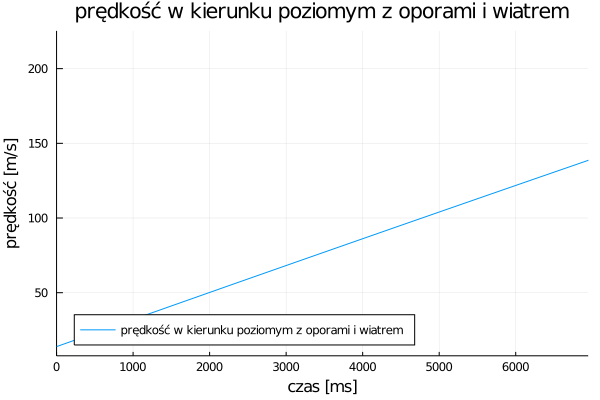

In [55]:
plot(vx_wind(v₀,vw, α, k, m, dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym z oporami i wiatrem",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku poziomym z oporami i wiatrem")

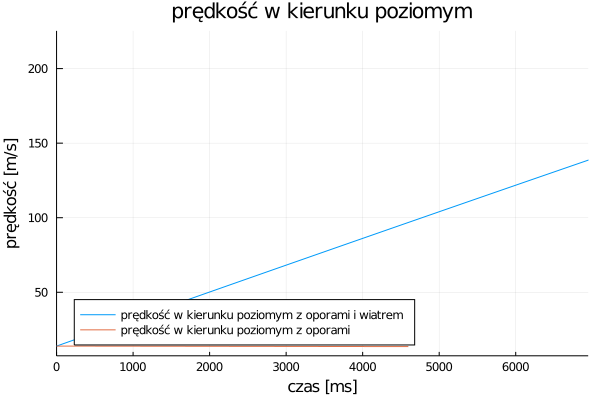

In [56]:
plot!(vx_num(v₀,α, k, m, dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym z oporami",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku poziomym")

In [57]:
function vy_wind(v₀, vw, α, k, m, g, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    vyw = zeros(floor(Int, (czas+t1) / dt), 1)
    vyw[1] = v₀ * sin(α)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        vyw[i] = vyw[i-1] + ((vy[i-1]+vw)^2/vy[i-1]) * dt
        
    end
    return vy
end

vy_wind (generic function with 1 method)

In [58]:
vy_wind(v₀, vw, α, k, m, g, dt)

11542×1 Array{Float64,2}:
  22.548943400154137
  22.53900812824636
  22.529072911534534
  22.51913775001836
  22.509202643697524
  22.499267592571723
  22.48933259664065
  22.479397655904002
  22.469462770361467
  22.45952794001274
  22.449593164857518
  22.43965844489549
  22.42972378012635
   ⋮
 -88.41323940580499
 -88.42255822114163
 -88.43187698470707
 -88.44119569650161
 -88.45051435652552
 -88.4598329647791
 -88.46915152126263
 -88.4784700259764
 -88.4877884789207
 -88.49710688009583
 -88.50642522950206
 -88.51574352713968

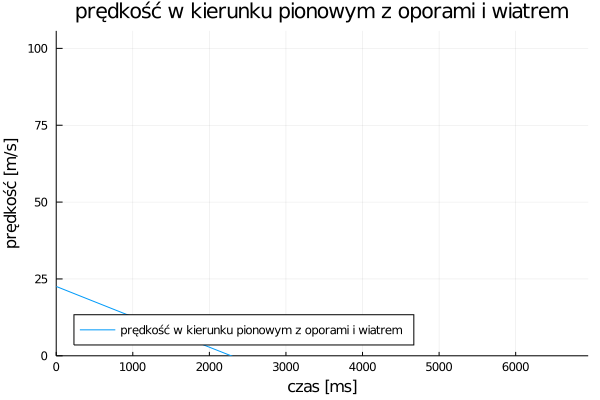

In [71]:
plot(vy_wind(v₀,vw, α, k, m, g,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku pionowym z oporami i wiatrem",
    xlim = (0, czas_opor),
    ylim=(0,hₘ_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku pionowym z oporami i wiatrem")

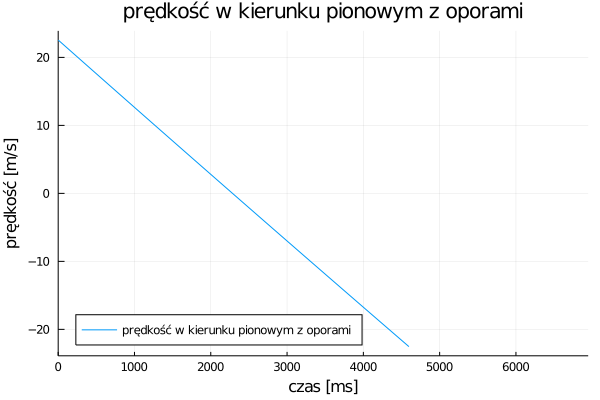

In [72]:
plot(vy_num(v₀, α, k, m, g,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku pionowym z oporami",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku pionowym z oporami")

In [61]:
function x_wind(v₀,vw, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    vxw = zeros(floor(Int, (czas+t1) / dt), 1)
    vxw[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        vxw[i] = vxw[i-1] +((vx[i-1]+vw)^2/vx[i-1])* dt
        x[i] = x[i-1] + vxw[i-1] * dt - (1 / 2) * (k / m) * vxw[i-1] * dt ^ 2
    end
    return x
end 

x_wind (generic function with 1 method)

In [62]:
x_wind(v₀,vw, α, k, m, dt)

11542×1 Array{Float64,2}:
    0.0
    0.01392099403413455
    0.027860196385398862
    0.04181760697805039
    0.055793225736347034
    0.06978705258454711
    0.08379908744690939
    0.09782933024769311
    0.11187778091115788
    0.1259444393615638
    0.14002930552317142
    0.15413237932024168
    0.16825366067703595
    ⋮
 1351.693190220236
 1351.9121292094414
 1352.131085562212
 1352.3500592784767
 1352.5690503581648
 1352.7880588012054
 1353.0070846075275
 1353.2261277770606
 1353.4451883097338
 1353.6642662054762
 1353.883361464217
 1354.102474085885

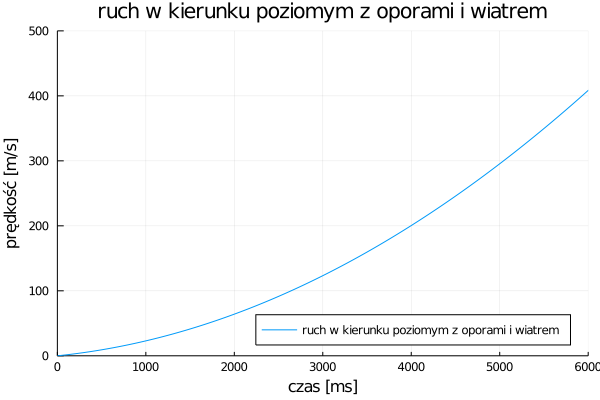

In [63]:
plot(x_wind(v₀,vw, α, k, m,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "ruch w kierunku poziomym z oporami i wiatrem",
    xlim = (0, 6000),
    ylim = (0, 500),
    legend = :bottomright,
    title = "ruch w kierunku poziomym z oporami i wiatrem")

In [64]:
function y_wind(v₀,vw, α, k, m,g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    vyw = zeros(floor(Int, (czas+t1) / dt), 1)
    vyw[1] = v₀ * sin(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        vyw[i] = vyw[i-1] + ((vy[i-1]+vw)^2/vy[i-1]) * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end 

y_wind (generic function with 1 method)

In [65]:
y_wind(v₀,vw, α, k, m,g,h, dt)

11542×1 Array{Float64,2}:
   80.0
   80.02254397576421
   80.04507801628411
   80.0676021216149
   80.09011629181177
   80.11262052692992
   80.13511482702452
   80.1575991921508
   80.18007362236393
   80.20253811771913
   80.22499267827158
   80.24743730407644
   80.26987199518895
    ⋮
 -306.53657602108177
 -306.62499391989525
 -306.71342113749824
 -306.80185767383887
 -306.8903035288654
 -306.978758702526
 -307.06722319476904
 -307.1556970055427
 -307.24418013479516
 -307.3326725824747
 -307.4211743485295
 -307.5096854329079

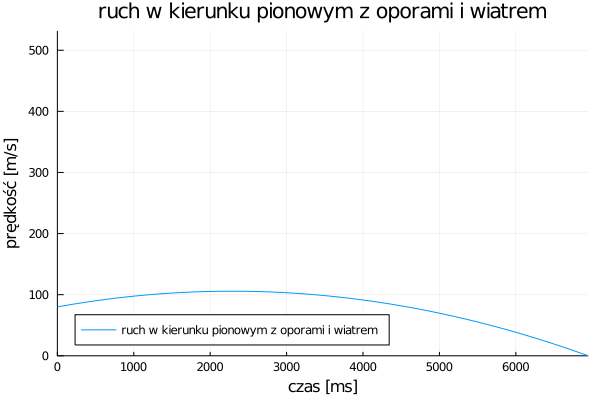

In [66]:
plot(y_wind(v₀,vw, α, k, m,g,h,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "ruch w kierunku pionowym z oporami i wiatrem",
    xlim = (0, czas_opor),
    ylim = (0, zasieg_opor),
    legend = :bottomleft,
    title = "ruch w kierunku pionowym z oporami i wiatrem")

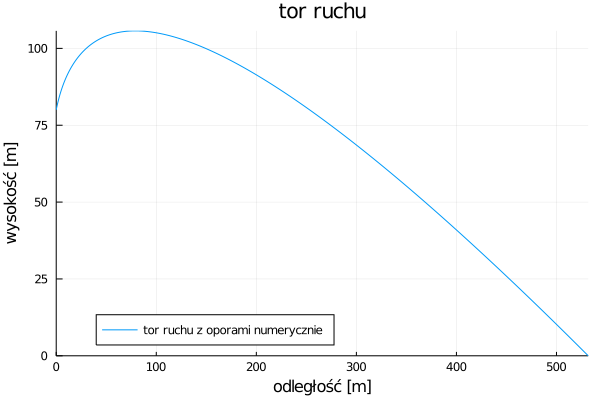

In [74]:

plot(x_wind(v₀,vw, α, k, m, dt), y_wind(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")



In [68]:
function v_wind(v₀, vw, α, k, m, g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    vyw = zeros(floor(Int, (czas+t1) / dt), 1)
    vyw[1] = v₀ * sin(α)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    vxw = zeros(floor(Int, (czas+t1) / dt), 1)
    vxw[1] = v₀ * cos(α)
    v = zeros(floor(Int, (czas+t1) / dt), 1)
    v[1] = sqrt(vxw[1]^2+vyw[1]^2)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        vyw[i] = vyw[i-1] + ((vy[i-1]+vw)^2/vy[i-1]) * dt
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        vxw[i] = vxw[i-1] +((vx[i-1]+vw)^2/vx[i-1])* dt
        v[i]=sqrt(vxw[i-1]^2+vyw[i-1]^2)
        
    end
    return v
end

v_wind (generic function with 1 method)

In [69]:
v_wind(v₀, vw, α, k, m, g,h, dt)


11542×1 Array{Float64,2}:
  26.5
  26.5
  26.53230682866614
  26.56460531012847
  26.596895445042538
  26.629177234064375
  26.66145067785051
  26.69371577705796
  26.72597253234423
  26.758220944367327
  26.790461013785727
  26.822692741258408
  26.854916127444824
   ⋮
 347.3696497904907
 347.4461623083308
 347.52268655800896
 347.5992225385164
 347.67577024884474
 347.752329687986
 347.8289008549326
 347.90548374867757
 347.98207836821393
 348.0586847125354
 348.13530278063604
 348.21193257151026

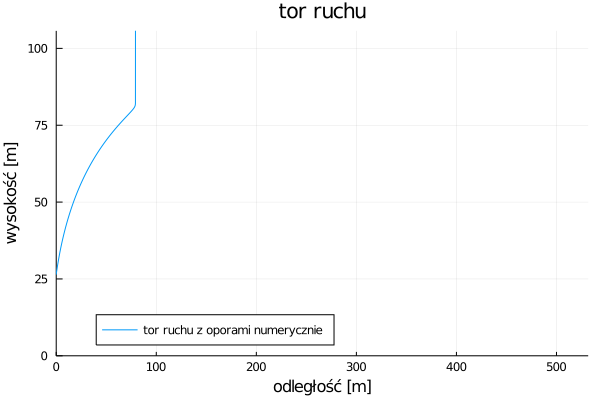

In [77]:
plot(x_wind(v₀, vw, α, k, m, dt),v_wind(v₀, vw, α, k, m, g,h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")
